### Libreta de _Jupyter_ donde se desarrolla el análisis sísmico del experimento de caída de roca en la barranca Montegrande, Volcán de Colima, que se presentó en el IX Congreso Nacional de Estudiantes de Ciencias de la Tierra bajo el título: _"Caracterización tiempo-frecuencia de la señal sísmica generada por una caída de roca en la barranca Montegrande, Volcán de Colima"_.

In [1]:
using DSP
using SAC
using PyPlot

In [2]:
bb = SAC.read("BBRockFall.sac");
geo = SAC.read("GeoRockFall.sac");

INFO: Data are little-endian; byteswapping
INFO: Data are little-endian; byteswapping


In [3]:
bb.t = bb.t*(410.744e-12);
geo.t = geo.t*(3.125e-8);

In [4]:
ti = (DateTime(2017,11,6,16,41,0):(Dates.Millisecond(1))*10:DateTime(2017,11,6,16,42,30));

In [5]:
ds1 = 1/(geo.delta*geo.npts);
ds2 = 1/(bb.delta*bb.npts);

In [6]:
fg = collect(0:geo.npts-1)*ds1;
n1 = convert(Int32,floor(geo.npts/2)+1);
fb = collect(0:bb.npts-1)*ds2;
n2 = convert(Int32,floor(bb.npts/2)+1);

In [7]:
rmean!(geo);
rtrend!(geo);
rmean!(bb);
rtrend!(bb);

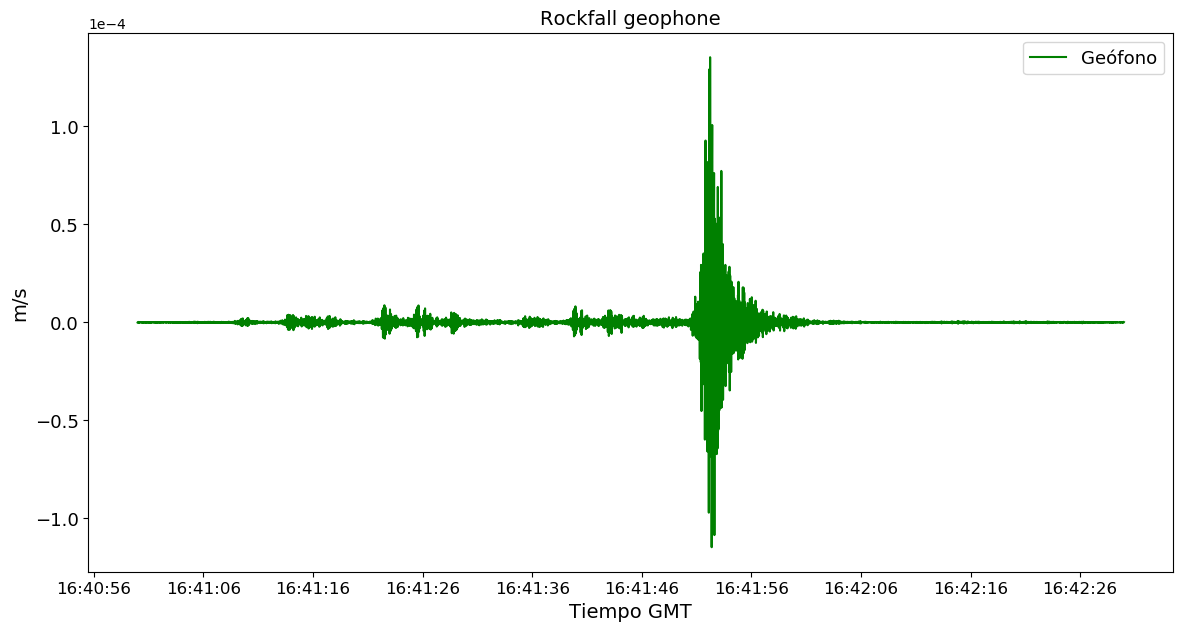

In [9]:
fig = figure(figsize=(14,7))
plot(ti,geo.t, label = "Geófono", "g")
#ax=gca()
title("Rockfall geophone", fontsize=14)
xlabel("Tiempo GMT", fontsize=14)
xticks(fontsize=12)
#ax[:ticklabel_format](format="sci",axis="y",scilimits=(0,0))
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("m/s", fontsize=14)
yticks(fontsize=13)
legend(loc="best",fontsize=13)
PyPlot.savefig("gt.png",dpi=500)

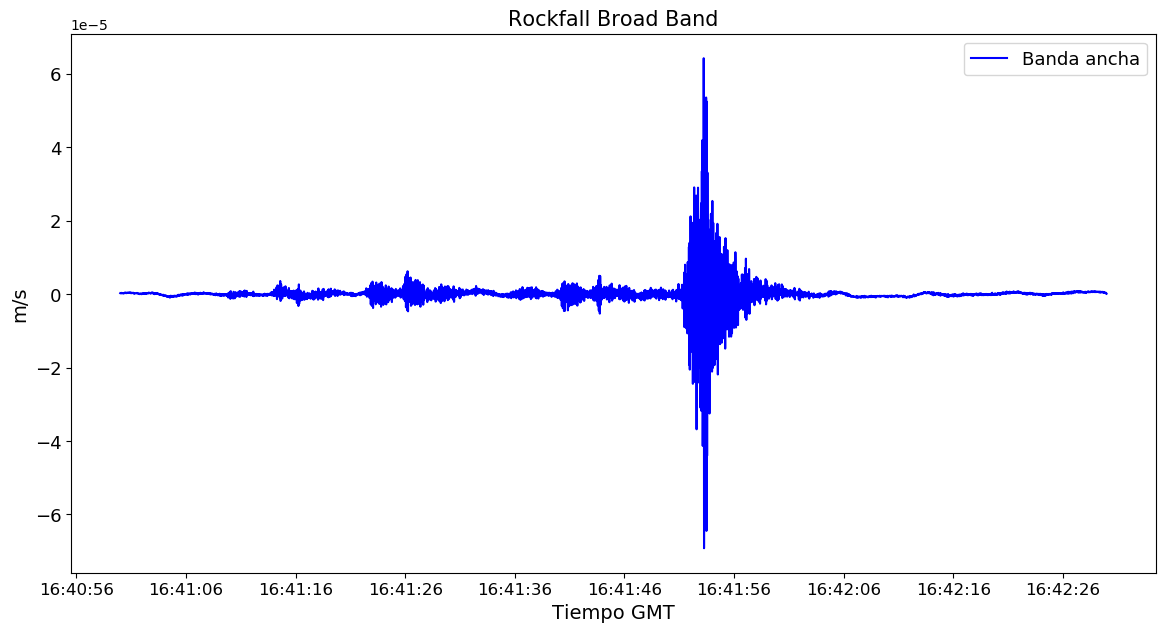

In [10]:
fig = figure(figsize=(14,7))
plot(ti,bb.t,label="Banda ancha","b")
title("Rockfall Broad Band", fontsize=15)
xlabel("Tiempo GMT", fontsize=14)
xticks(fontsize=12)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("m/s", fontsize=14)
yticks(fontsize=13)
legend(loc="best",fontsize=13)
PyPlot.savefig("bt.png",dpi=500)

## _fft_

In [8]:
fou = abs.(fft(geo.t,1));
fou2 = fou.^2;
fou3 = fou2.*2;
fgn = fou3./100;
fgnr = fgn./maximum(fgn);

## Filtro Butterworth pasa-bandas BB: 1-49 Hz

In [11]:
bbr = Bandpass(1,49,fs=100)
desig = Butterworth(4)
fil = filt(digitalfilter(bbr,desig),bb.t);

In [12]:
filb = abs.(fft(fil,1));
filbn = filb./maximum(filb);

In [13]:
filb2 = filb.^2;
filb3 = filb2.*2;
ffbn = filb3./100;

## Método de Welch

In [14]:
w = welch_pgram(geo.t,fs=100);
wn = w.power/maximum(w.power);

In [15]:
wfil = welch_pgram(fil,fs=100);
wfiln = wfil.power/maximum(wfil.power);

## Multitaper

In [16]:
mt = mt_pgram(geo.t,fs=100);
mtn = mt.power/maximum(mt.power);

In [17]:
mtbf = mt_pgram(fil,fs=100);
mtbfn = mtbf.power/maximum(mtbf.power);

## Espectrogramas

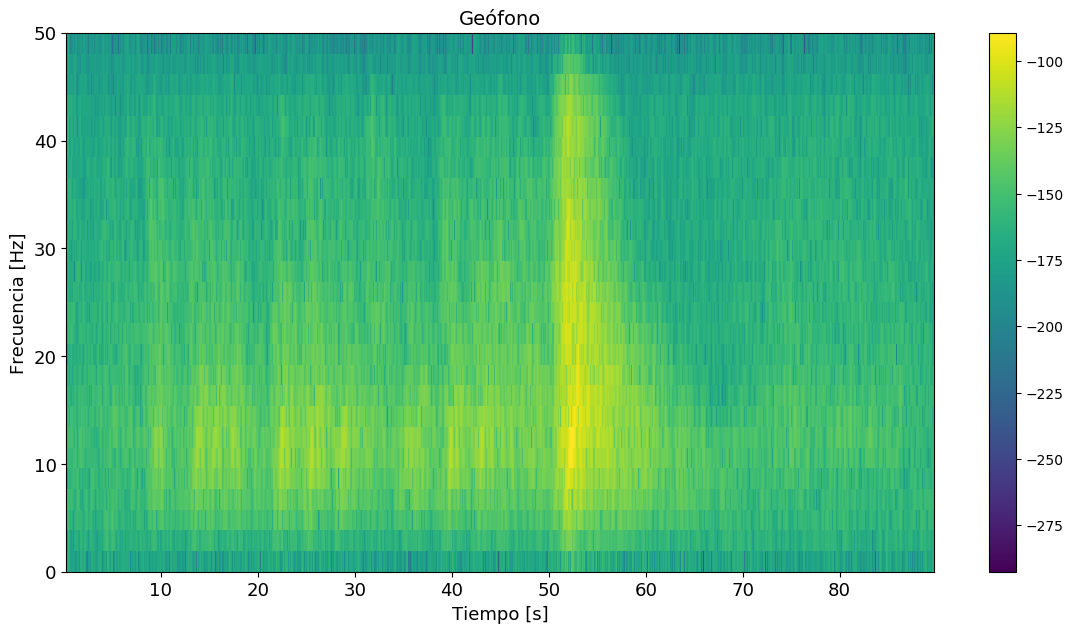

In [18]:
#Geófono
fig = figure(figsize=(14,7))
specgram(geo.t,50,100,pad_to=50,noverlap=49)
title("Geófono", fontsize=14)
xlabel("Tiempo [s]", fontsize=13)
xticks(fontsize=13)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)
PyPlot.colorbar()
#(mappable=None, cax=None, ax=None, grays)
PyPlot.savefig("spec_g.png", dpi=500)

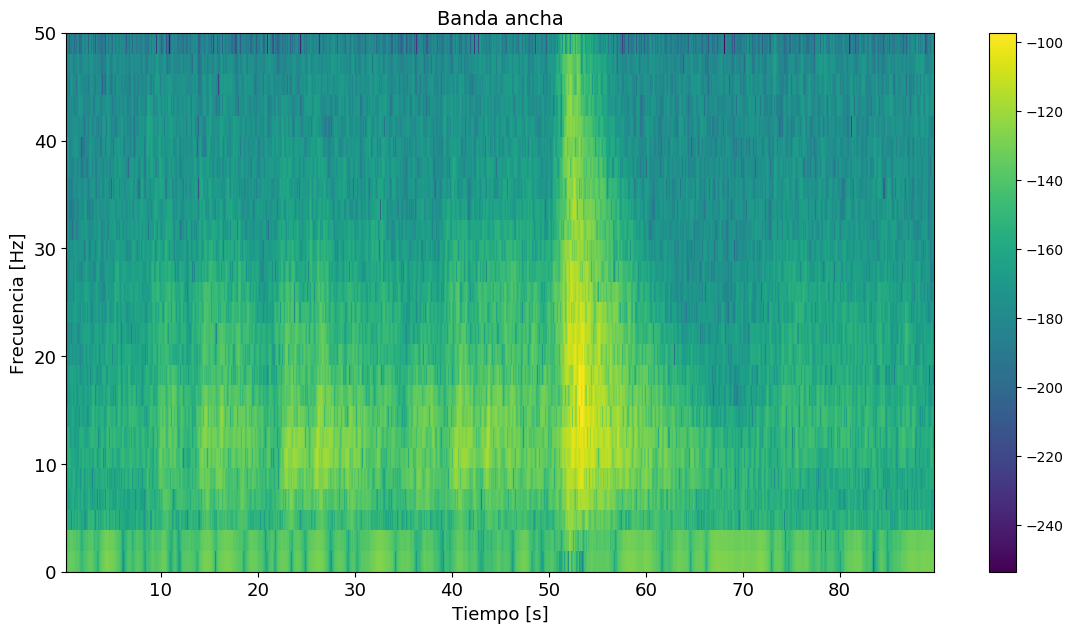

In [19]:
#Banda ancha
fig = figure(figsize=(14,7))
specgram(bb.t,50,100,pad_to=50,noverlap=49)
title("Banda ancha", fontsize=14)
xlabel("Tiempo [s]", fontsize=13)
xticks(fontsize=13)
ylabel("Frecuencia [Hz]", fontsize=13)
yticks(fontsize=13)
colorbar()
PyPlot.savefig("spec_bb.png",dpi=500)

## 3 Métodos Geófono

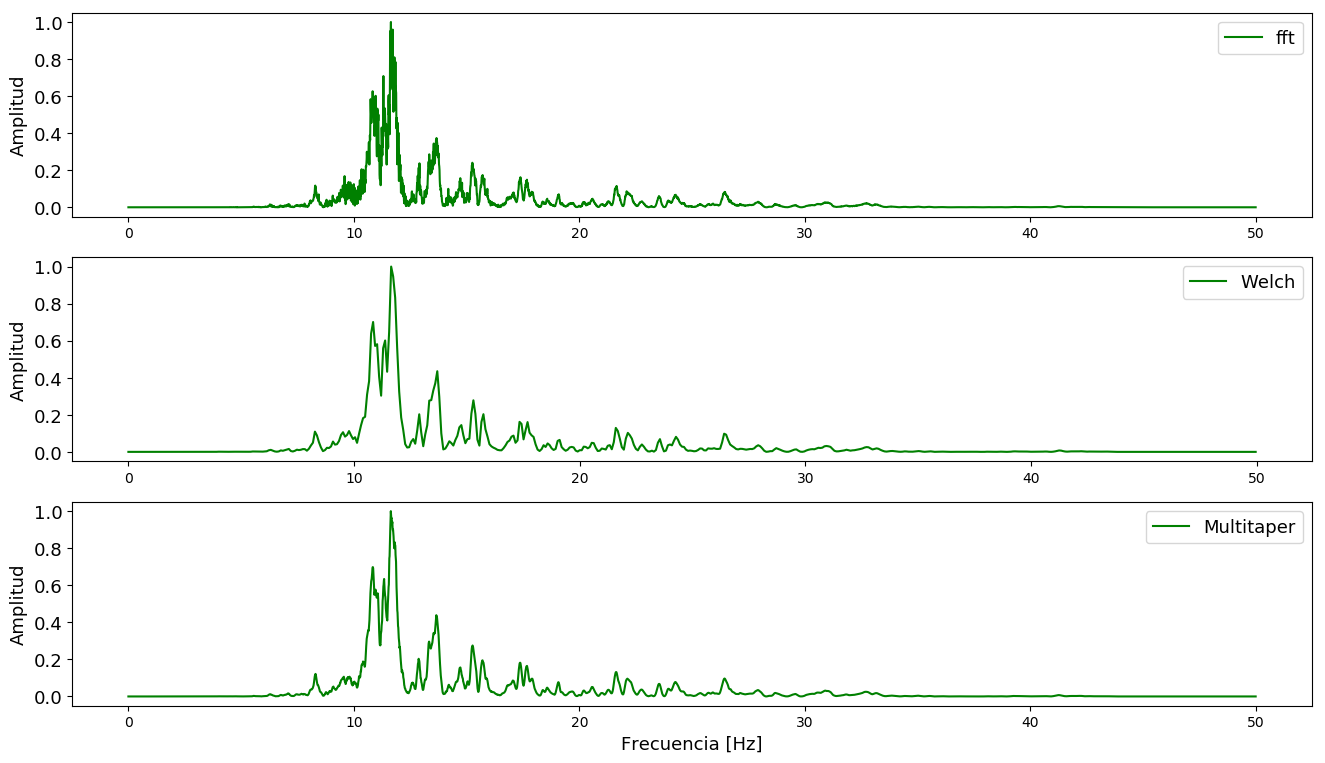

In [20]:
fig = figure(figsize=(16,9))
subplot(3,1,1)
plot(fg[1:n1],fgnr[1:n1], label="fft","g")
#title("fft", fontsize=15)
#xlabel("Frecuencia [Hz]",fontsize=13)
xticks(fontsize=10)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("Amplitud",fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
subplot(3,1,2)
plot(w.freq,wn, "g", label="Welch")
#title("Welch", fontsize=14)
#xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=10)
ticklabel_format(format="sci",axis="y")
#,scilimits=(0,0))
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
subplot(3,1,3)
plot(mt.freq,mtn,label="Multitaper", "g")
#title("Multitaper", fontsize=14)
xlabel("Frecuencia [Hz]",fontsize=13)
xticks(fontsize=10)
ticklabel_format(format="sci",axis="y")
#,scilimits=(0,0))
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("3s_geo.png",dpi=500)

## 3 Métodos Banda ancha

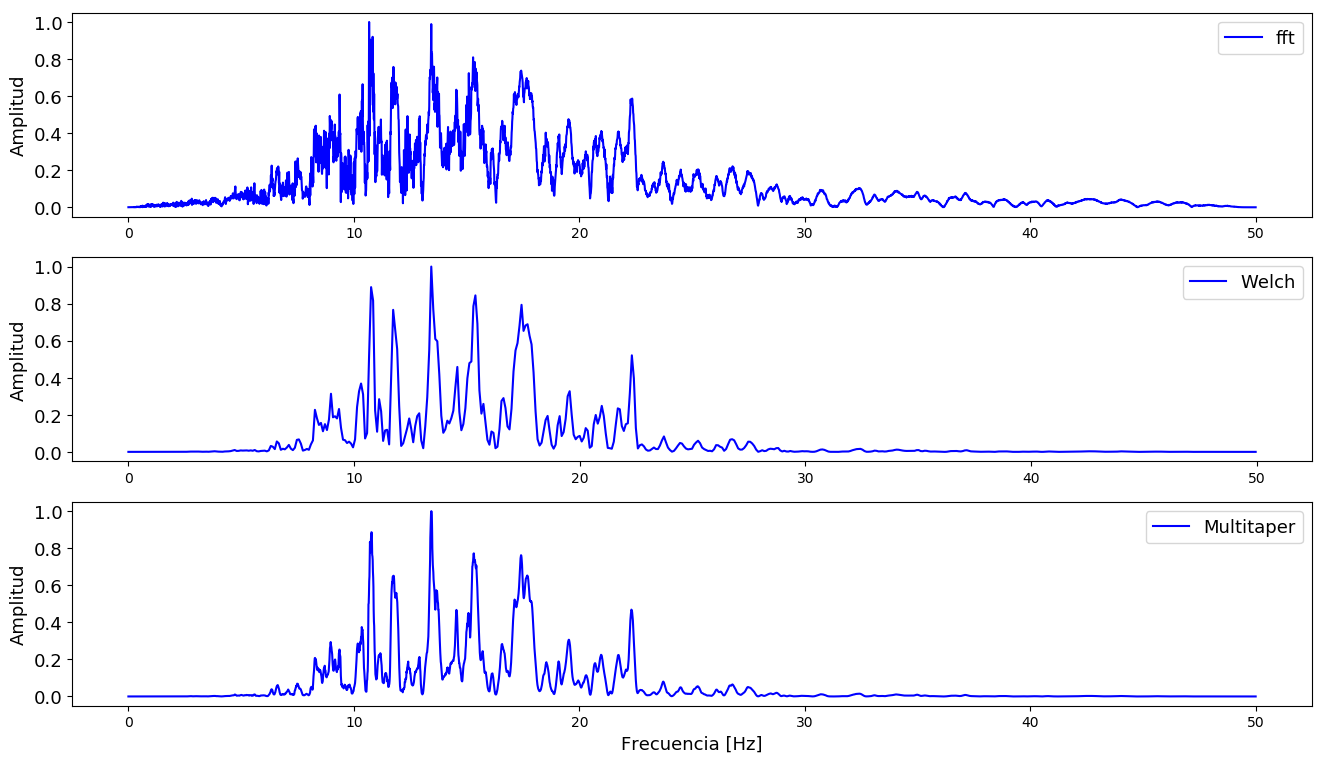

In [21]:
fig = figure(figsize=(16,9))
subplot(3,1,1)
plot(fb[1:n1],filbn[1:n1], label="fft" ,"b")
#title("fft", fontsize=14)
#xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=10)
ticklabel_format(format="sci",axis="y",scilimits=(0,0))
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
subplot(3,1,2)
plot(wfil.freq,wfiln,label="Welch" ,"b")
#title("Welch", fontsize=14)
#xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=10)
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
subplot(3,1,3)
plot(mtbf.freq,mtbfn,label="Multitaper","b")
#title("Multitaper", fontsize=14)
xlabel("Frecuencia [Hz]", fontsize=13)
xticks(fontsize=10)
ylabel("Amplitud", fontsize=13)
yticks(fontsize=13)
legend(loc="best", fontsize=13)
PyPlot.savefig("3s_bb.png",dpi=500)